Multivariate Nomal (MVN)
다변수 (가우시안) 정규 분포
- 복수의 확률 변수 모형화에 이용

$$\mathcal{N}(x ; \mu, \Sigma) = \dfrac{1}{(2\pi)^{D/2} |\Sigma| ^{1/2}} \exp \left( -\dfrac{1}{2} (x-\mu)^T \Sigma^{-1} (x-\mu) \right)$$

SciPy stats
- `multivariate_nomal`

In [1]:
%matplotlib inline

In [2]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

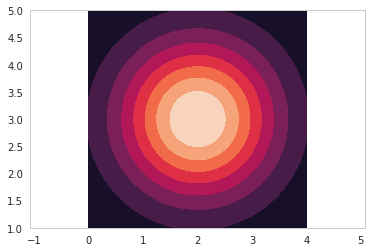

In [3]:
xx = np.linspace(0, 4, 120)
yy = np.linspace(1, 5, 150)
XX, YY = np.meshgrid(xx, yy)

mu = [2, 3] # 2차원 벡터 
cov = [[1, 0], [0, 1]] # 2 x 2 공분산 행렬
rv = sp.stats.multivariate_normal(mu, cov)

plt.grid(False)
plt.contourf(XX, YY, rv.pdf(np.dstack([XX, YY])))
plt.axis("equal")
plt.show()

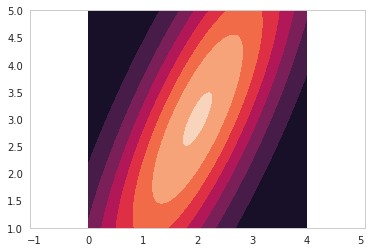

In [4]:
xx = np.linspace(0, 4, 120)
yy = np.linspace(1, 5, 150)
XX, YY = np.meshgrid(xx, yy)

mu = [2, 3]
cov = [[2, 3],[3, 7]]
rv = sp.stats.multivariate_normal(mu, cov)

plt.grid(False)
plt.contourf(XX, YY, rv.pdf(np.dstack([XX, YY])))
plt.axis("equal")
plt.show()

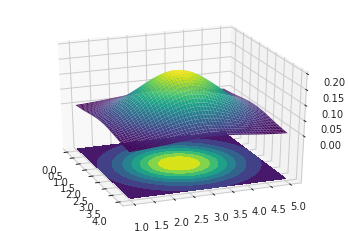

In [5]:
X = np.linspace(0, 4, 120)
Y = np.linspace(1, 5, 150)
X, Y = np.meshgrid(X, Y)

mu = np.array([2, 3]) # 2차원 벡터 
Sigma = np.array([[1, 0], [0, 1]]) # 2 x 2 공분산 행렬
rv = sp.stats.multivariate_normal(mu, Sigma)

pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X
pos[:, :, 1] = Y

def multivariate_gaussian(pos, mu, Sigma):
    """Return the multivariate Gaussian distribution on array pos.

    pos is an array constructed by packing the meshed arrays of variables
    x_1, x_2, x_3, ..., x_k into its _last_ dimension.

    """

    n = mu.shape[0]
    Sigma_det = np.linalg.det(Sigma)
    Sigma_inv = np.linalg.inv(Sigma)
    N = np.sqrt((2*np.pi)**n * Sigma_det)
    # This einsum call calculates (x-mu)T.Sigma-1.(x-mu) in a vectorized
    # way across all the input variables.
    fac = np.einsum('...k,kl,...l->...', pos-mu, Sigma_inv, pos-mu)

    return np.exp(-fac / 2) / N

# The distribution on the variables X, Y packed into pos.
Z = multivariate_gaussian(pos, mu, Sigma)

# Create a surface plot and projected filled contour plot under it.
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(X, Y, Z, rstride=3, cstride=3, linewidth=1, antialiased=True,
                cmap=cm.viridis)

cset = ax.contourf(X, Y, Z, zdir='z', offset=-0.15, cmap=cm.viridis)

# Adjust the limits, ticks and view angle
ax.set_zlim(-0.15,0.2)
ax.set_zticks(np.linspace(0,0.2,5))
ax.view_init(27, -21)

plt.show()

In [6]:
xx = np.linspace(0, 4, 120)
yy = np.linspace(1, 5, 150)
XX, YY= np.meshgrid(xx, yy)
RR = np.sqrt(XX**2 + YY*2)
ZZ = np.sin(RR)

mu = [2, 3, 0] # 3차원 벡터 
cov = [[1, 0, 0], [0, 1, 0], [0, 0, 1]] # 3 X 3 공분산 행렬
rv = sp.stats.multivariate_normal(mu, cov)

# how?

# plt.grid(False)
# a = plt.contourf(ZZ, rv.pdf(np.dstack([XX, YY, ZZ])))
# a.levels
# plt.contourf(XX, YY, ZZ, rv.pdf(np.dstack([XX, YY, ZZ])))
# plt.axis("equal")
# plt.show()

# fig = plt.figure()
# ax = Axes3D(fig)
# ax.plot_surface(XX, YY, ZZ, rstride=1, cstride=1, cmap='hot')
# plt.show()